# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
#%matplotlib notebook

In [9]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

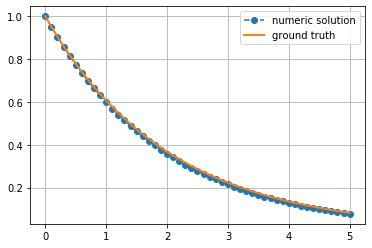

In [10]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

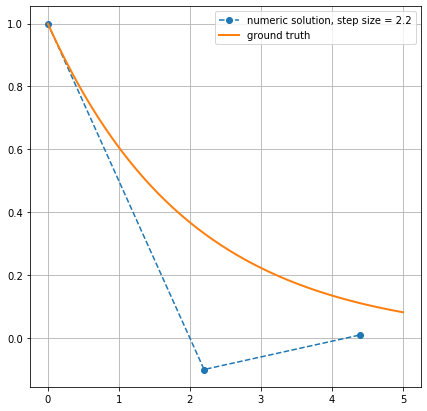

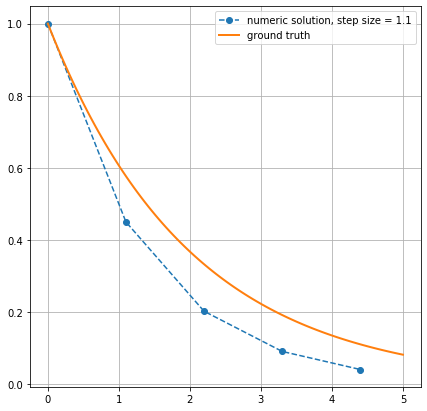

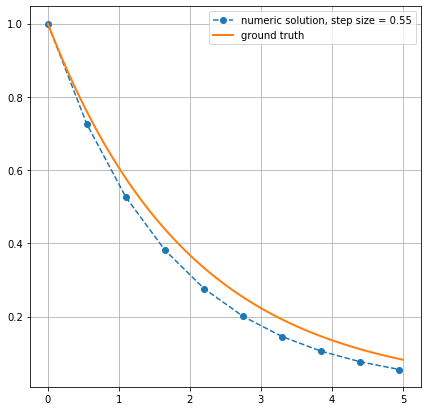

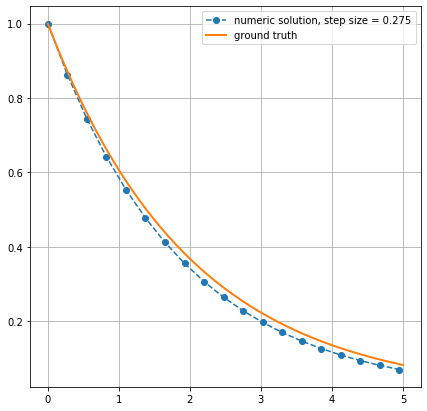

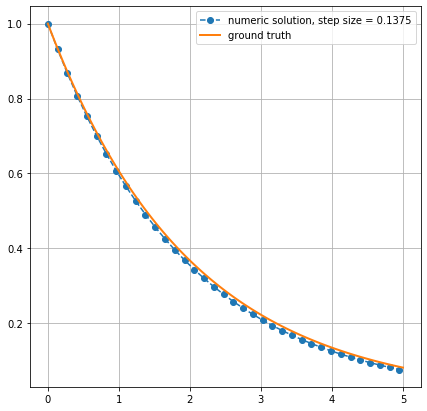

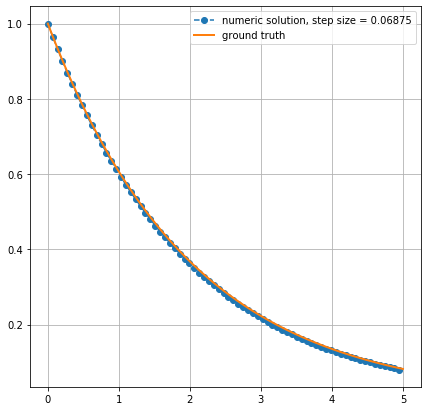

In [11]:
# ... ENTER YOUR CODE HERE ...
tau = 2.2
for _ in range(6):
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=tau)
    ttt = np.linspace(0,5,100)
    plt.figure(figsize=[7,7])
    plt.plot(tt, y, 'o--', label='numeric solution, step size = {}'.format(tau))
    plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    tau /=2


### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [12]:
# ... ENTER YOUR CODE AND DISCUSSION HERE ...
def euler_solve_impl(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(0, num_steps):
        y[k+1] = y[k]/(1-dt*lam)
    return tt, y


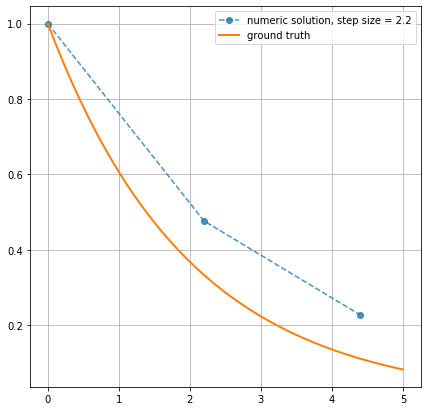

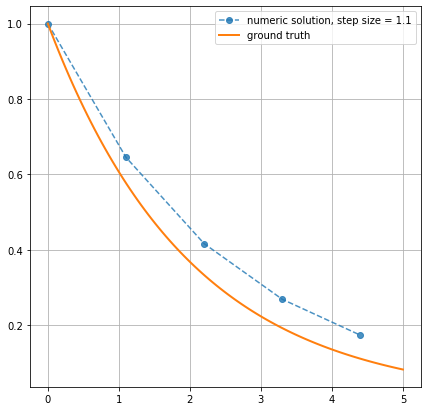

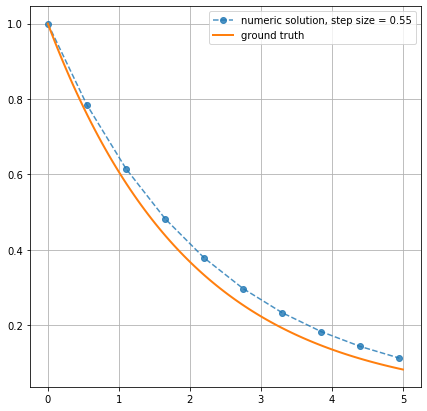

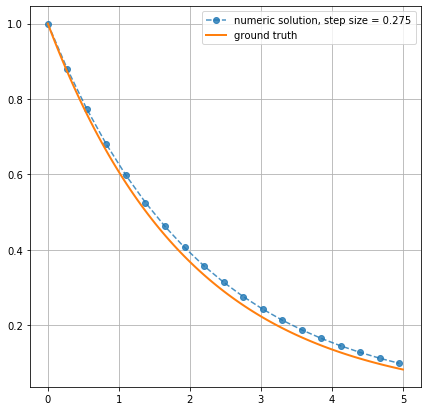

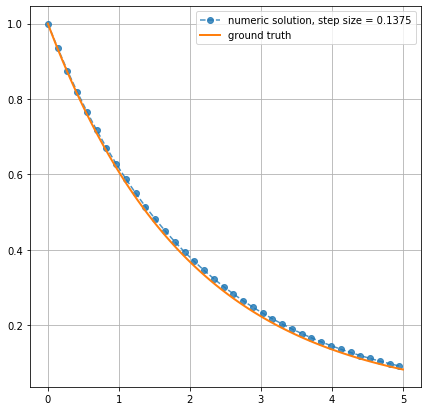

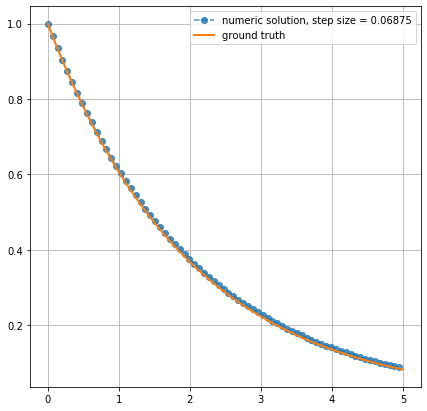

In [13]:
tau = 2.2
for _ in range(6):
    tt, y = euler_solve_impl(lam, u0=1.0, T=5, dt=tau)
    ttt = np.linspace(0,5,100)
    plt.figure(figsize=[7,7])
    plt.plot(tt, y, 'o--', label='numeric solution, step size = {}'.format(tau), alpha=0.8)
    plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    tau /=2

Как выяснится дальше, алгоритм более устойчивый относительно изменения тау, что видно из того, Как строится решение. Судя по картинкам, сходятся они примерно с одной и той же скоростью

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [14]:
# ... ENTER YOUR CODE HERE ...
def general_euler_solve_expl(A, u0,T,dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1,2])
    y[0,:] = u0
    for k in range(num_steps):
        y[k+1,:] = y[k, :] + dt*A@y[k,:]
    return tt, y


def general_euler_solve_impl(A, u0,T,dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1,2])
    y[0,:] = u0
    for k in range(num_steps):
        y[k+1,:] = np.linalg.solve((np.eye(2) - dt*A),y[k,:])
    return tt, y 


### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [15]:
# ... ENTER YOUR CODE HERE ...
A = np.array([[-10.,10.],[32.,-499.]])

eigs = la.eigvals(A)
s = (np.max(abs(eigs))/np.min(abs(eigs)))
if s>10:
    print("Stiff")


tt, yy = general_euler_solve_expl(A, np.array([1,0]),15.,0.01)
print(np.max(yy))

Stiff
nan


C:\Users\kosyr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  
C:\Users\kosyr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  


Видим, что алгоритм расходится, так как отображение перестаёт сжимать при такой матрице и таком соотношении собственных чисел с шагом. Шаг вообще находится на границе сходимости. А результат уходит в $\infty$


### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [16]:
# ... ENTER YOUR CODE HERE ...
t_impl, y_impl = general_euler_solve_impl(A, np.array([1,0]),15.,0.01)
print(np.max(y_impl))

1.0


# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{\dot{u}^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

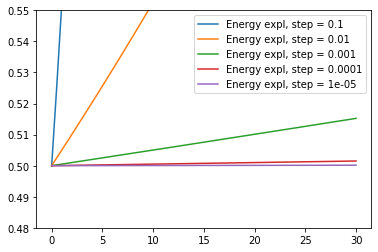

In [17]:
# ... ENTER YOUR CODE HERE ...
def oscill_mat(omega):
    return np.array([[0,-omega**2],[1,0]])


omega = 1.
for i in range(5):
    step=10**(-i-1)
    t_osc, y_osc = general_euler_solve_expl(oscill_mat(omega), np.array([0.,1.]) , 30., step)
    en = y_osc[:,1]**2/2+omega**2*y_osc[:,0]**2/2
    plt.plot(t_osc,en, label = "Energy expl, step = {}".format(step))


plt.ylim((0.48,0.55))
plt.legend(loc="best")
plt.show()

Видим, что энергия не сохраняется, а медленно растёт по времени. Однако, по мере увеличения точности первый интеграл начинает сохраняться.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

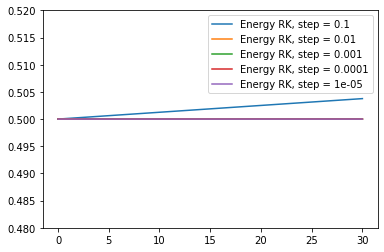

In [19]:
# ... ENTER YOUR CODE HERE ...
def RK_sch(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1,2])
    y[0,:] = u0
    for k in range(num_steps):
        pred_step = y[k, :] + dt*A@y[k,:]/2
        y[k+1,:] = y[k, :] + dt*A@pred_step
    return tt, y


for i in range(5):
    step=10**(-i-1)
    t_osc_rk, y_osc_rk = RK_sch(oscill_mat(omega), np.array([0.,1.]) , 30., step)
    en_rk = y_osc_rk[:,1]**2/2+omega**2*y_osc_rk[:,0]**2/2
    plt.plot(t_osc_rk,en_rk, label = "Energy RK, step = {}".format(step))

plt.ylim((0.48,0.52))
plt.legend(loc="best")
plt.show()

Квадратичный алгоритм работает лучше и решает точнее линейного, отсюда, собственно и более качественное сохранение энергии